# Netflix Shows Analysis

Netflix Shows dataset contains data from a popular service called Netflix. I got this dataset from kaggle.com. In this analysis, I will be using matplotlib, seaborn, numpy to create visualization on this dataset.

## Downloading the Dataset

At the beginning, the necessary packages is installed.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows?select=netflix_titles.csv' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dylontan
Your Kaggle Key: ········


100%|██████████| 1.18M/1.18M [00:00<00:00, 69.1MB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './netflix-shows'

In [5]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "netflix-shows-analysis" # change this (use lowercase letters and hyphens only)

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dylontan1027/netflix-shows-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dylontan1027/netflix-shows-analysis


'https://jovian.ai/dylontan1027/netflix-shows-analysis'

## Data Preparation and Cleaning

I first take a look at how the dataset looks like by using the command from Pandas.



In [10]:
import pandas as pd

In [11]:
df = pd.read_csv(data_dir + '/netflix_titles.csv')

Now, I use .shape, .sample, .describe, .info to know the basic info of the dataset.

In [12]:
df.shape

(7787, 12)

In [13]:
df.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
598,s599,TV Show,Ask the StoryBots,NaN,"Judy Greer, Erin Fitzgerald, Fred Tatasciore, ...",United States,"August 2, 2019",2019,TV-Y,3 Seasons,Kids' TV,Five curious little creatures track down the a...
4842,s4843,Movie,Phantom,Kabir Khan,"Saif Ali Khan, Katrina Kaif, Sabyasachi Chakra...",India,"October 1, 2018",2015,TV-14,129 min,"Action & Adventure, International Movies",India's primary intelligence agency sends an e...
7221,s7222,TV Show,Trigger Warning with Killer Mike,NaN,Killer Mike,NaN,"January 18, 2019",2019,TV-MA,1 Season,"Docuseries, Stand-Up Comedy & Talk Shows","In this funny and provocative series, rapper a..."
1071,s1072,Movie,Brad Paisley's Comedy Rodeo,Jay Chapman,"Brad Paisley, Nate Bargatze, John Heffron, Jon...",United States,"August 15, 2017",2017,TV-MA,63 min,Stand-Up Comedy,Country music star Brad Paisley hosts a night ...
1723,s1724,Movie,Deuces,Jamal Hill,"Larenz Tate, Meagan Good, Lance Gross, Antoniq...",United States,"April 1, 2017",2016,TV-MA,88 min,Dramas,Assigned to go undercover to take down an impe...
654,s655,Movie,Baadshaho,Milan Luthria,"Ajay Devgn, Emraan Hashmi, Vidyut Jamwal, Ilea...",India,"October 16, 2017",2017,TV-14,135 min,"Action & Adventure, International Movies","In 1975, during the government-declared Emerge..."
7122,s7123,Movie,Toc Toc,Vicente Villanueva,"Paco León, Alexandra Jiménez, Rossy de Palma, ...",Spain,"May 1, 2018",2017,TV-MA,96 min,"Comedies, International Movies",A group of patients with OCD wait for their fl...
615,s616,TV Show,Atomic Puppet,NaN,"Eric Bauza, Lisa Norton, Carlos Díaz, Peter Ol...","Canada, France","December 1, 2017",2016,TV-Y7,1 Season,"Crime TV Shows, Kids' TV, TV Comedies","Captain Atomic – once a superhero, now a sock ..."
5828,s5829,Movie,Story of an Egg,Raj B. Shetty,"Raj B. Shetty, Usha Bhandary, Shailashree, Pra...",India,"October 15, 2017",2017,TV-PG,132 min,"Comedies, International Movies, Romantic Movies",When an astrologer gives him one year to find ...
6867,s6868,Movie,The Siege of Jadotville,Richie Smyth,"Jamie Dornan, Guillaume Canet, Emmanuelle Seig...","Ireland, South Africa","October 7, 2016",2016,TV-MA,108 min,"Action & Adventure, Dramas, International Movies","Besieged by overwhelming enemy forces, Irish s..."


In [15]:
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Then, I need to take a look at the unique values of the type and rating of the Netflix Shows.

In [17]:
cat = ['type', 'rating']

for column in cat:
  print(column, ':', df[column].unique(), '\n')

type : ['TV Show' 'Movie'] 

rating : ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG'
 'G' 'NC-17' 'TV-Y7-FV' 'UR'] 



In [18]:
import jovian

In [19]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dylontan1027/netflix-shows-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dylontan1027/netflix-shows-analysis


'https://jovian.ai/dylontan1027/netflix-shows-analysis'

## Exploratory Analysis and Visualization

To have a visualization on this dataset, I use histogram, bar plot to show the distribution of this dataset based on the columns.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [20]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

I use histogram to show the distribution of all the Netflix's TV Show and Movie.

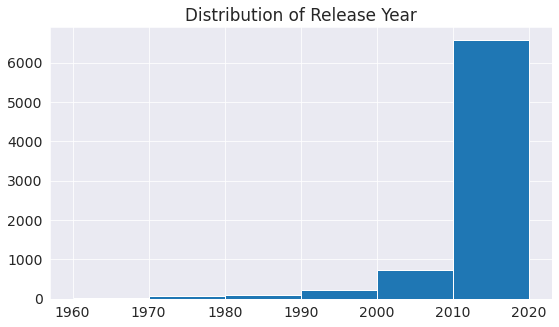

In [21]:
import numpy as np

plt.title("Distribution of Release Year")
plt.hist(df.release_year, bins=np.arange(1960,2030,10));

I use bar plot to show the distribution of Top 10 country that produced the TV shows or movies.

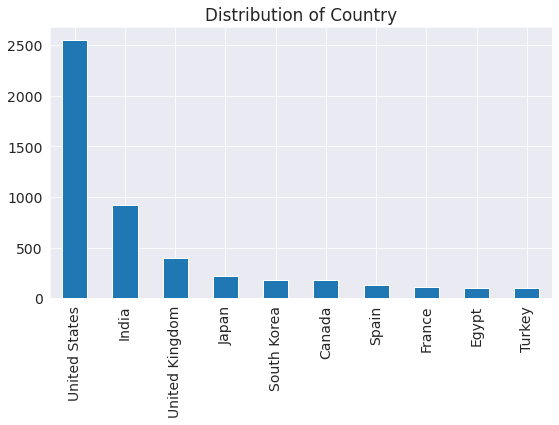

In [22]:
plt.title("Distribution of Country")
df['country'].value_counts()[:10].plot(kind='bar');

I use bar plot to show the distribution of top 10 cast that involved in the TV shows and movies. Numpy is used to arrange the y tick label.

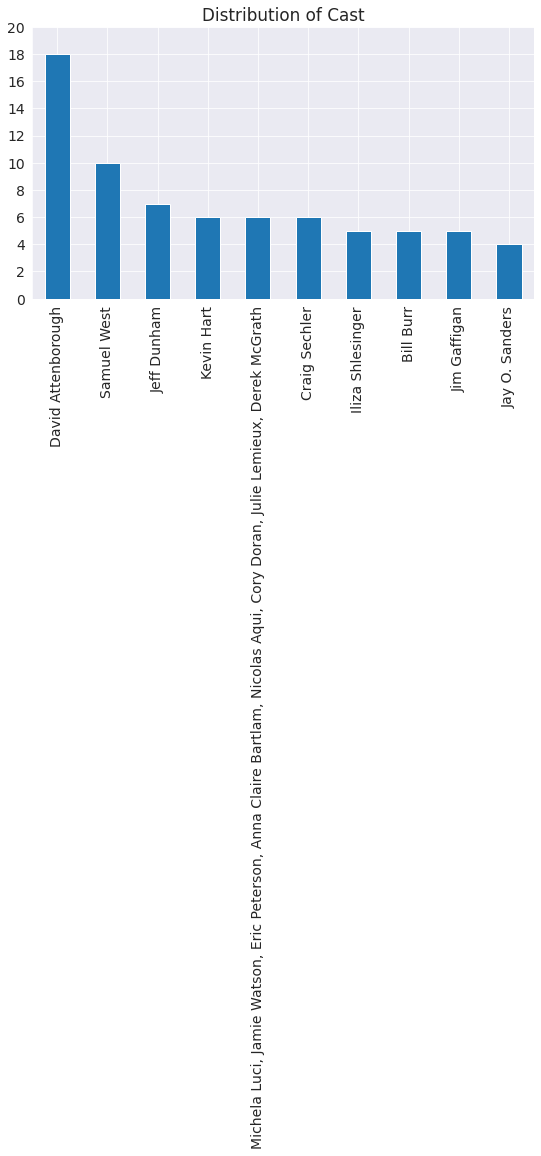

In [23]:
plt.title("Distribution of Cast")
df['cast'].value_counts()[:10].plot(kind='bar')
plt.yticks(np.arange(0, 22, 2));

I use bar plot to show the distribution of top 10 director in TV shows and movies.Numpy is used to arrange the y tick label.

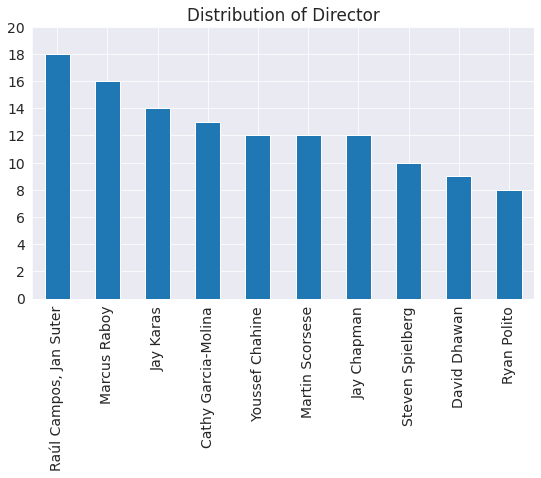

In [24]:
plt.title("Distribution of Director")
df['director'].value_counts()[:10].plot(kind='bar')
plt.yticks(np.arange(0, 22, 2));

I use bar plot to show the distribution of top 10 listing of TV shows and movies. Numpy is used to arrange the y tick label.

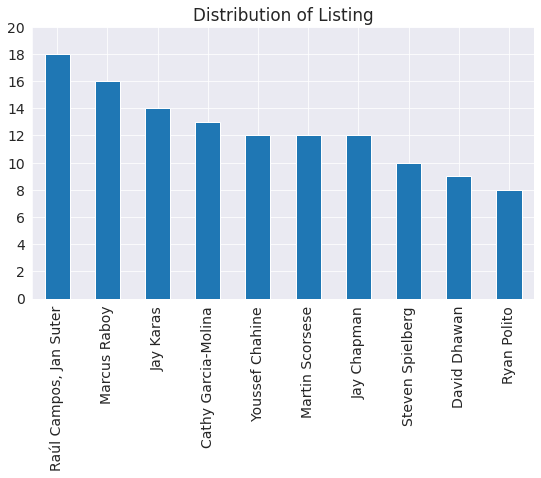

In [25]:
plt.title("Distribution of Listing")
df['director'].value_counts()[:10].plot(kind='bar')
plt.yticks(np.arange(0, 22, 2));

Let us save and upload our work to Jovian before continuing

In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dylontan1027/netflix-shows-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dylontan1027/netflix-shows-analysis


'https://jovian.ai/dylontan1027/netflix-shows-analysis'

## Asking and Answering Questions

#### Q1: List top 10 longest duration of Movie

In [28]:
movie_df = df[df.type == "Movie"]

In [29]:
movie_df[['duration_new','Xvalue']] = movie_df['duration'].str.split(' ', n=1, expand=True)
del movie_df['Xvalue']
movie_df['duration_new'] = movie_df['duration_new'].apply(pd.to_numeric)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/tmp/ipykernel_35/2466482537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_new'] = movie_df['duration_new'].apply(pd.to_numeric)


In [30]:
top10_df = movie_df.sort_values(['duration_new'], ascending=False).head(10)

In [31]:
top10_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_new
957,s958,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question...",312
6850,s6851,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...,253
4490,s4491,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,237
3694,s3695,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...,233
5108,s5109,Movie,Raya and Sakina,Hussein Kamal,"Suhair El-Babili, Shadia, Abdel Moneim Madboul...",NaN,"May 21, 2020",1984,TV-14,230 min,"Comedies, Dramas, International Movies",When robberies and murders targeting women swe...,230
5376,s5377,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,228
3521,s3522,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"January 10, 2021",2001,PG,224 min,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ...",224
3195,s3196,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008,TV-14,214 min,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate...",214
6507,s6508,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",2019,R,209 min,Dramas,Hit man Frank Sheeran looks back at the secret...,209
3282,s3283,Movie,Kabhi Khushi Kabhie Gham,Karan Johar,"Amitabh Bachchan, Jaya Bhaduri, Shah Rukh Khan...",India,"April 1, 2020",2001,TV-14,209 min,"Dramas, International Movies",Years after his father disowns his adopted bro...,209


The longest duration of Movie is Black Mirror: Bandersnatch	which has 312 minutes.

#### Q2: Plot a barplot of the Top 10 listed in.

In [32]:
df[['L1','L2','L3']] = df['listed_in'].str.split(', ', expand= True)
df.sample(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,L1,L2,L3
4471,s4472,TV Show,Nightmare High,NaN,"So-hyun Kim, Min-hyuk Lee, Ki-joon Uhm, Da-Ye ...",South Korea,"February 15, 2017",2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...","After a new teacher arrives, students' dreams ...",International TV Shows,Korean TV Shows,TV Dramas
2906,s2907,Movie,I Am Wrath,Chuck Russell,"John Travolta, Christopher Meloni, Amanda Schu...",United States,"September 16, 2019",2016,R,91 min,"Action & Adventure, Dramas","Hell-bent on avenging his wife's murder, Stanl...",Action & Adventure,Dramas,None
4252,s4253,TV Show,Mr. Iglesias,NaN,"Gabriel Iglesias, Sherri Shepherd, Jacob Varga...",United States,"December 8, 2020",2020,TV-14,3 Seasons,"TV Comedies, Teen TV Shows",Hilarious high school teacher Gabriel Iglesias...,TV Comedies,Teen TV Shows,None
1216,s1217,Movie,Caregiver,Chito S. Roño,"Sharon Cuneta, John Estrada, John Manalo, Rica...",Philippines,"March 5, 2019",2008,TV-14,131 min,"Dramas, International Movies",Sarah leaves her son in the Philippines to reu...,Dramas,International Movies,None
4139,s4140,Movie,Miss Julie,Liv Ullmann,"Jessica Chastain, Colin Farrell, Samantha Mort...","Norway, United Kingdom, France, Ireland","September 2, 2015",2014,PG-13,130 min,"Dramas, International Movies","On a summer night in 1890 Ireland, the unsettl...",Dramas,International Movies,None
4692,s4693,Movie,Our Godfather,"Mark Franchetti, Andrew Meier",Tommaso Buscetta,United Kingdom,"September 10, 2019",2019,TV-MA,93 min,"Documentaries, International Movies","In 1986, Tommaso Buscetta became the first top...",Documentaries,International Movies,None
2614,s2615,Movie,Happy Old Year,Nawapol Thamrongrattanarit,"Chutimon Chuengcharoensukying, Sunny Suwanmeth...",Thailand,"March 26, 2020",2019,TV-MA,113 min,"Dramas, International Movies, Romantic Movies","While decluttering her home, a woman’s hefty h...",Dramas,International Movies,Romantic Movies
3851,s3852,TV Show,Maggie & Bianca: Fashion Friends,Iginio Straffi,"Emanuela Rei, Giorgia Boni, Sergio Ruggeri, Lu...",Italy,"March 31, 2019",2017,TV-Y7,1 Season,"Kids' TV, TV Comedies","Originally polar opposites, an American fashio...",Kids' TV,TV Comedies,None
672,s673,TV Show,Babylon Berlin,NaN,"Volker Bruch, Liv Lisa Fries, Peter Kurth, Leo...",Germany,"March 1, 2020",2020,TV-MA,3 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A Soviet freight train's hijacking leads a hau...,Crime TV Shows,International TV Shows,TV Dramas
3326,s3327,Movie,Katti Batti,Nikhil Advani,"Imran Khan, Kangana Ranaut, Abhishek Saha, Mit...",India,"November 1, 2018",2015,TV-14,132 min,"Comedies, Dramas, International Movies","After falling in love during college, architec...",Comedies,Dramas,International Movies


In [33]:
L1_df = df.groupby(['L1']).size().reset_index(name='counts_L1')
L2_df = df.groupby(['L2']).size().reset_index(name='counts_L2')
L3_df = df.groupby(['L3']).size().reset_index(name='counts_L3')
L1_df = L1_df.rename(columns = {'L1': 'listed'})
L2_df = L2_df.rename(columns = {'L2': 'listed'})
L3_df = L3_df.rename(columns = {'L3': 'listed'})

In [34]:
combined_df = pd.merge(L2_df, L3_df, how='outer')
combined2_df = pd.merge(combined_df, L1_df, how = 'outer')
combined2_df

,listed,counts_L2,counts_L3,counts_L1
0,Anime Features,38.0,NaN,19.0
1,Children & Family Movies,27.0,3.0,502.0
2,Classic & Cult TV,6.0,NaN,21.0
3,Classic Movies,22.0,4.0,77.0
4,Comedies,387.0,10.0,1074.0
5,Crime TV Shows,58.0,NaN,369.0
6,Cult Movies,37.0,10.0,12.0
7,Documentaries,34.0,1.0,751.0
8,Docuseries,141.0,18.0,194.0
9,Dramas,665.0,57.0,1384.0


In [35]:
combined2_df['Total'] = combined2_df.loc[:, 'counts_L2':'counts_L1'].sum(1)
L_top10_df = combined2_df.sort_values(['Total'], ascending=False).head(10)
L_top10_df

,listed,counts_L2,counts_L3,counts_L1,Total
13,International Movies,1535.0,788.0,114.0,2437.0
9,Dramas,665.0,57.0,1384.0,2106.0
4,Comedies,387.0,10.0,1074.0,1471.0
14,International TV Shows,424.0,85.0,690.0,1199.0
7,Documentaries,34.0,1.0,751.0,786.0
37,Action & Adventure,NaN,NaN,721.0,721.0
30,TV Dramas,296.0,346.0,62.0,704.0
12,Independent Movies,512.0,141.0,20.0,673.0
1,Children & Family Movies,27.0,3.0,502.0,532.0
20,Romantic Movies,136.0,392.0,3.0,531.0


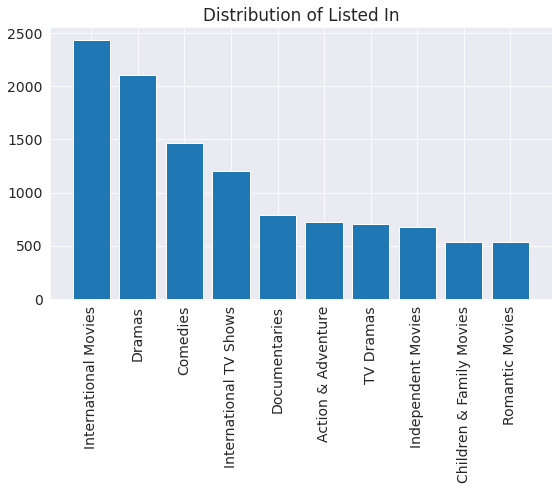

In [36]:
plt.title("Distribution of Listed In")
plt.bar(L_top10_df.listed, L_top10_df.Total)
plt.xticks(rotation=90);

The highest listed in is International Movies which has approximately 2400.

#### Q3: Consider the share of different Netflix Shows.

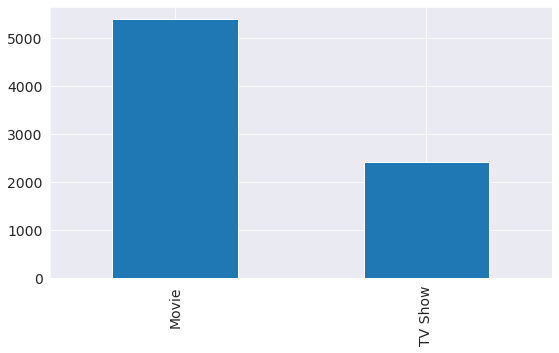

In [37]:
fig, ax = plt.subplots()
df['type'].value_counts().plot(ax=ax, kind='bar');

In [38]:
T1_df = df.groupby(['type']).size().reset_index(name='counts_type')
T1_df

,type,counts_type
0,Movie,5377
1,TV Show,2410


In [39]:
T2_df = T1_df.set_index('type')
T2_df

,counts_type
type,
Movie,5377
TV Show,2410


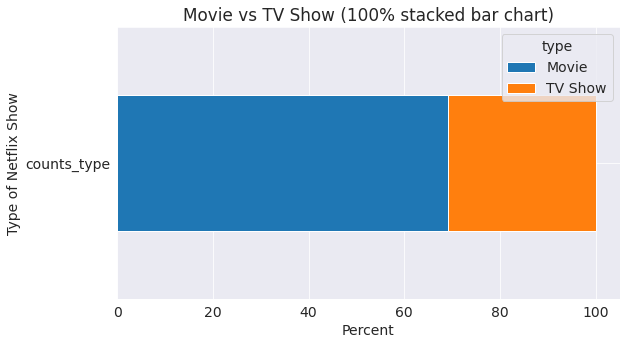

In [40]:
stacked_data = T2_df.transpose().apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="barh", stacked=True)
plt.title("Movie vs TV Show (100% stacked bar chart)")
plt.xlabel("Percent")
plt.ylabel("Type of Netflix Show");

The TV show has almost half proportion of the Movie.

#### Q4: Draw a scatter plot about the distribution of the shows based on the release year.

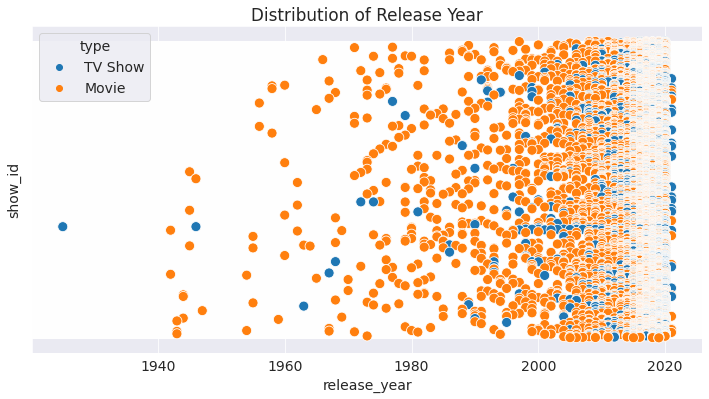

In [41]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Release Year')

sns.scatterplot(x=df.release_year, 
                y=df.show_id, 
                hue=df.type,
                s=100)
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([]);

It can be seen that the movie and TV show is highly distributed after year 2000.

#### Q5: Find the longest seasons of Netflix's TV Show.

In [42]:
TVshow_df = df[df.type == 'TV Show']
TVshow_df.sample(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,L1,L2,L3
3744,s3745,TV Show,Love Alarm,NaN,"Kim So-hyun, Jung Ga-ram, Song Kang, Ko Min-si...",South Korea,"August 22, 2019",2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",In a world where an app alerts people if someo...,International TV Shows,Korean TV Shows,Romantic TV Shows
3506,s3507,TV Show,La Viuda Negra,Alejandro Lozano,"Ana Serradilla, Julián Román, Ramiro Meneses, ...","Colombia, Mexico, United States","January 15, 2019",2016,TV-14,1 Season,"Crime TV Shows, International TV Shows, Spanis...","Beautiful and ruthless Griselda Blanco, known ...",Crime TV Shows,International TV Shows,Spanish-Language TV Shows
5044,s5045,TV Show,Qurious Como,NaN,NaN,NaN,"October 3, 2020",2017,TV-Y,1 Season,Kids' TV,"Shrunk down in size, Como and his friends exam...",Kids' TV,None,None
1303,s1304,TV Show,Chef & My Fridge,NaN,"Seong-joo Kim​, Jung-hwan Ahn",South Korea,"August 4, 2017",2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Reali...",The best chefs of Korea go head-to-head to cre...,International TV Shows,Korean TV Shows,Reality TV
289,s290,TV Show,Absurd Planet,NaN,Afi Ekulona,United States,"April 22, 2020",2020,TV-PG,1 Season,"Docuseries, Science & Nature TV, TV Comedies",A cast of quirky critters and Mother Nature he...,Docuseries,Science & Nature TV,TV Comedies
4672,s4673,TV Show,Operation Proposal,NaN,"Seung-ho Yoo, Eun-bin Park, Kyung-pyo Go, Ye-w...",South Korea,"July 1, 2016",2012,TV-PG,1 Season,"International TV Shows, Korean TV Shows, Roman...","On Yi-seul's wedding day, her friend Baek-ho w...",International TV Shows,Korean TV Shows,Romantic TV Shows
1560,s1561,TV Show,Cyborg 009 VS Devilman,NaN,"Jun Fukuyama, Shintaro Asanuma, Haruka Shirais...","Japan, United States","April 1, 2016",2015,TV-MA,1 Season,"Anime Series, International TV Shows",When a Black Ghost scientist releases newly mo...,Anime Series,International TV Shows,None
1712,s1713,TV Show,Designated Survivor: 60 Days,NaN,"Ji Jin-hee, Lee Jun-hyuk, Heo Jun-ho, Kang Han...",South Korea,"July 2, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, TV Dr...",When the National Assembly suffers a catastrop...,International TV Shows,Korean TV Shows,TV Dramas
2271,s2272,TV Show,Free Rein,NaN,"Jaylen Barron, Manpreet Bambra, Celine Buckens...",United States,"July 6, 2019",2019,TV-G,3 Seasons,"British TV Shows, Kids' TV, TV Dramas",A 15-year-old from LA spends the summer at her...,British TV Shows,Kids' TV,TV Dramas
7416,s7417,TV Show,Victorious,NaN,"Victoria Justice, Leon Thomas III, Matt Bennet...",United States,"November 2, 2019",2013,TV-G,3 Seasons,"Kids' TV, TV Comedies",When aspiring singer Tori Vega joins the eccen...,Kids' TV,TV Comedies,None


In [43]:
TVshow_df[['duration_new','Yvalue']] = TVshow_df['duration'].str.split(' ', n=1, expand=True)
del TVshow_df['Yvalue']
TVshow_df['duration_new'] = TVshow_df['duration_new'].apply(pd.to_numeric)
TVshow_df

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/tmp/ipykernel_35/1171630534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TVshow_df['duration_new'] = TVshow_df['duration_new'].apply(pd.to_numeric)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,L1,L2,L3,duration_new
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy,4
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,International TV Shows,TV Dramas,TV Mysteries,1
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",Crime TV Shows,International TV Shows,TV Dramas,1
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,Crime TV Shows,Docuseries,International TV Shows,1
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",International TV Shows,TV Dramas,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",International TV Shows,Romantic TV Shows,TV Dramas,1
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,Anime Series,Kids' TV,None,1
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",Kids' TV,Korean TV Shows,TV Comedies,2
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,International TV Shows,Spanish-Language TV Shows,Stand-Up Comedy & Talk Shows,1


In [44]:
top1_df = TVshow_df.sort_values(['duration_new'], ascending=False).head(1)
top1_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,L1,L2,L3,duration_new
2538,s2539,TV Show,Grey's Anatomy,NaN,"Ellen Pompeo, Sandra Oh, Katherine Heigl, Just...",United States,"May 9, 2020",2019,TV-14,16 Seasons,"Romantic TV Shows, TV Dramas",Intern (and eventual resident) Meredith Grey f...,Romantic TV Shows,TV Dramas,None,16


In [45]:

print("The longest TV show has {} seasons.".format(int(top1_df.duration_new))) 

The longest TV show has 16 seasons.


Let us save and upload our work to Jovian before continuing.

In [46]:
import jovian

In [47]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dylontan1027/netflix-shows-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dylontan1027/netflix-shows-analysis


'https://jovian.ai/dylontan1027/netflix-shows-analysis'

## Inferences and Conclusion

There are different ways of answering questions such as using dataframe, bar chart, 100% stacked bar chart, scatter plot and using text. In the conclusion, I could said that this dataset is very useful because of its completeness and lack of missing values which makes it a very superb dataset to use.

In [48]:
import jovian

In [49]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "dylontan1027/netflix-shows-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/dylontan1027/netflix-shows-analysis


'https://jovian.ai/dylontan1027/netflix-shows-analysis'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [50]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>